In [11]:
from seml import database_utils as db_utils
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
results = db_utils.get_results('example_experiment', to_data_frame=True)

In [22]:
results.head()

,_id,config.dataset,config.db_collection,config.display_step,config.hidden_sizes,config.keep_prob,config.learning_rate,config.max_epochs,config.overwrite,config.patience,config.reg_scale,config.seed,result.test_acc,result.test_loss
0,1,small_dataset_1,example_experiment,25,[16],0.740696,0.00001,334,1,10,1.087746e-04,815912163,2.736447,5.725189
1,2,small_dataset_1,example_experiment,25,[16],0.746743,0.00001,245,2,50,1.275356e-04,164973081,0.656545,5.296356
2,3,small_dataset_1,example_experiment,25,[16],0.311091,0.00001,827,3,50,1.338918e-09,36331105,-1.015286,4.071151
3,4,small_dataset_1,example_experiment,25,"[32, 16]",0.740696,0.00001,334,4,10,1.087746e-04,5863334,0.879143,1.308891
4,5,small_dataset_1,example_experiment,25,"[32, 16]",0.746743,0.00001,245,5,50,1.275356e-04,23880611,0.589812,7.940028


In [36]:
# Pandas doesn't like lists as groupby keys.
results['config.hidden_sizes'] = results['config.hidden_sizes'].astype(str)

In [37]:
results.groupby(['config.dataset', 'config.hidden_sizes'])['result.test_loss'].agg('mean')

config.dataset   config.hidden_sizes
large_dataset_1  [64, 32]               4.109954
                 [64]                   9.266628
large_dataset_2  [64, 32]               4.087044
                 [64]                   4.843988
small_dataset_1  [16]                   5.210090
                 [32, 16]               4.940274
small_dataset_2  [16]                   4.777097
                 [32, 16]               5.010437
Name: result.test_loss, dtype: float64

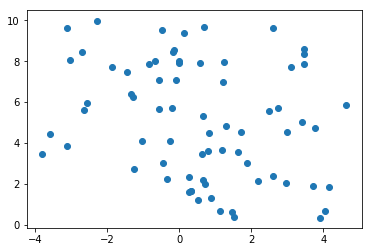

In [38]:
plt.scatter(results['result.test_acc'], results['result.test_loss'])
plt.show()